In [1]:
import pandas as pd
loan=pd.read_csv('output.csv')
pd.set_option('display.max_columns', None)

In [2]:
X=loan.drop(columns=['loan_status','loan_status_grouped','emp_title','purpose','title','issue_d', 'grade', 'annual_inc'])
y=loan['loan_status_grouped']

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

def sub_grades_encoding(x):
    grade_mapping = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
    number_mapping = {'1': 0.8, '2': 0.6, '3': 0.4, '4': 0.2, '5': 0.0}
    
    val = grade_mapping.get(x[0], 0) + number_mapping.get(x[1], 0)
    return val

X['sub_grade']= X['sub_grade'].apply(sub_grades_encoding)

In [4]:
#Separate numerical and non-numerical columns
ordinal_columns = ['emp_length']
categorical_columns = ['home_ownership', 'term']
numerical_columns = X.select_dtypes(include=['float64']).columns

# Apply Label Encoding to ordinal columns before splitting
le = LabelEncoder()
for col in ordinal_columns:
    X[col] = le.fit_transform(X[col])

# Apply OneHotEncoding to categorical columns before splitting
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Now perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Ensure the train and test sets have the same structure (dummies already handled)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Apply scaling to numerical columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(X_train.columns))
pca.fit(X_train)

PCA(n_components=23)

In [6]:
import numpy as np
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

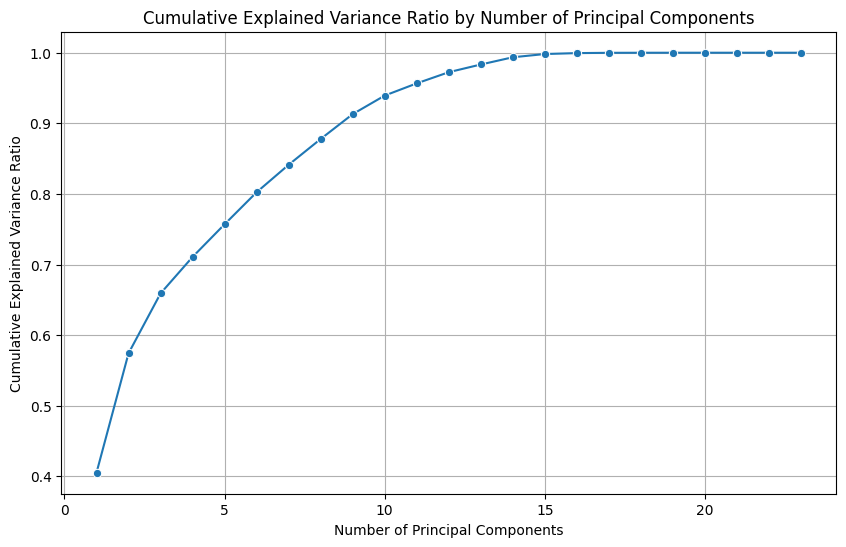

In [7]:
# Create a DataFrame for cumulative explained variance ratio
import matplotlib.pyplot as plt
import seaborn as sns

cvr = pd.DataFrame({

    'Number of Principal Components': range(1, len(cumulative_variance_ratio) + 1),

    'Cumulative Explained Variance Ratio': cumulative_variance_ratio

})


# Set up the figure

plt.figure(figsize=(10, 6))


# Create the line plot using Seaborn

sns.lineplot(data=cvr,

             x='Number of Principal Components',

             y='Cumulative Explained Variance Ratio',

             marker='o')  # Adding markers for clarity

# Add title and labels

plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')

plt.xlabel('Number of Principal Components')

plt.ylabel('Cumulative Explained Variance Ratio')

# Add grid lines for better readability

plt.grid(True)

# Show the figure

plt.show()

In [8]:
pca = PCA(n_components=17)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import metrics

model = keras.Sequential([
    layers.Dense(25, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes and softmax activation

])

In [11]:
model.compile(optimizer='adam',

              loss='sparse_categorical_crossentropy', # for label encoding, transform it to one

              metrics=['accuracy'])

In [13]:
X_train_pca.shape[0]/64

3207.859375

In [14]:
# Train the model

model.fit(X_train_pca, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
2567/2567 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9319 - loss: 0.2084 - val_accuracy: 0.9803 - val_loss: 0.0803
Epoch 2/10
2567/2567 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9813 - loss: 0.0779 - val_accuracy: 0.9835 - val_loss: 0.0702
Epoch 3/10
2567/2567 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9835 - loss: 0.0700 - val_accuracy: 0.9849 - val_loss: 0.0643
Epoch 4/10
2567/2567 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9845 - loss: 0.0652 - val_accuracy: 0.9852 - val_loss: 0.0654
Epoch 5/10
2567/2567 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9855 - loss: 0.0636 - val_accuracy: 0.9856 - val_loss: 0.0614
Epoch 6/10
2567/2567 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.9857 - loss: 0.0618 - val_accuracy: 0.9854 - val_loss: 0.0628
Epoch 7/10
2567/2567 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.9866 - loss: 0.0595 - val_accuracy: 0.9859 - val_loss: 0.0609
Epoch 8/10
2567/2567 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.9870 - loss

In [15]:
# Evaluate the model

loss, accuracy = model.evaluate(X_test_pca, y_test)

print('Test accuracy:', accuracy)

1604/1604 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9876 - loss: 0.0566
Test accuracy: 0.9868097901344299


1604/1604 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


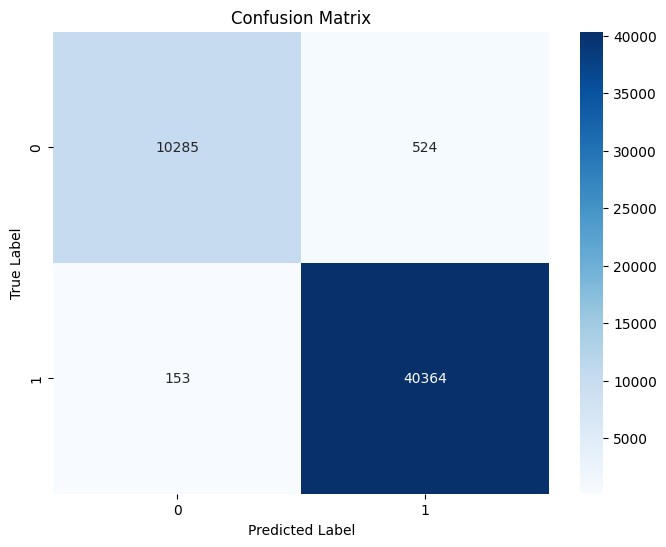

In [27]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_pca)

y_pred_classes = np.argmax(y_pred, axis=1)


# Create confusion matrix

cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix as heatmap

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.xlabel('Predicted Label')

plt.ylabel('True Label')

plt.title('Confusion Matrix')

plt.show()

In [22]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=500,        # Number of boosting rounds
    learning_rate=0.1,       # Step size shrinkage to prevent overfitting
    max_depth=3,             # Maximum depth of a tree
    subsample=0.8,           # Subsample ratio of the training data
    colsample_bytree=0.8,    # Subsample ratio of features for each tree
    gamma=0,                 # Minimum loss reduction required to make a further partition
    reg_lambda=1,            # L2 regularization term
    objective='binary:logistic' # For multiclass classification (use 'binary:logistic' for binary)
)

In [23]:
xgb.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

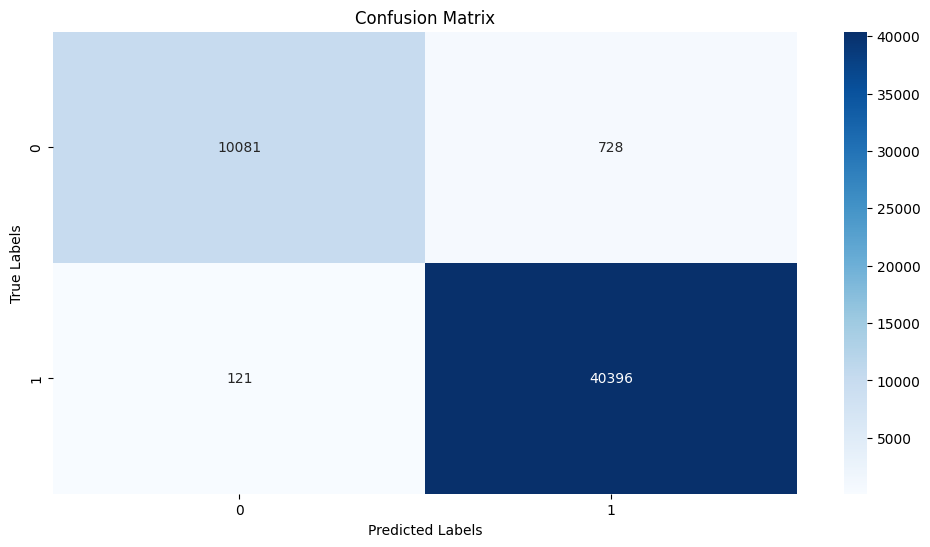

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96     10809
         1.0       0.98      1.00      0.99     40517

    accuracy                           0.98     51326
   macro avg       0.99      0.96      0.97     51326
weighted avg       0.98      0.98      0.98     51326

Accuracy Test: 0.9834586759147411
F1 Score Test: 0.9832812318424422


In [26]:
y_pred_test_xgb = xgb.predict(X_test_pca)

cm = confusion_matrix(y_test, y_pred_test_xgb)

# Create a heatmap using Seaborn

plt.figure(figsize=(12, 6))  # Set the figure size

sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', cbar=True, xticklabels=['0', '1'], yticklabels=['0', '1'])

# Add titles and labels

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()

print(classification_report(y_test, y_pred_test_xgb))

Accuracy_Test = accuracy_score(y_test, y_pred_test_xgb)

F1_Score_Test = f1_score(y_test, y_pred_test_xgb, average='weighted')

print(f"Accuracy Test: {Accuracy_Test}")

print(f"F1 Score Test: {F1_Score_Test}")